In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data Prep

In [44]:
cols = ['date_submitted', 'workout_date', 'activity_type',
       'calories_burned', 'distance', 'workout_len', 'avg_pace', 'max_pace', 'avg_speed',
       'max_speed', 'avg_heart_rate', 'steps', 'notes', 'source','link']

In [45]:
units_d = {'calories_burned':'kCal', 'distance':'mi', 'workout_len': 'seconds', 
           'avg_pace': 'min/mi', 'max_pace': 'min/mi', 'avg_speed': 'mi/h', 
           'max_speed': 'mi/h'}

In [182]:
bike_df = pd.read_csv('Kevins_workout_history.csv')
bike_df.columns = cols 
# split off the identifier
bike_df['ride_id'] = [int(bike_df.link[ik].split('/')[-1]) for ik in range(len(bike_df))] 
bike_df['workout_ts'] = [pd.to_datetime(bike_df['workout_date'][ik]) for ik in range(len(bike_df))]


bike_df['am_pm'] = ['' for ik in range(len(bike_df))]#np.zeros(len(bike_df))

In [209]:
#filter out workday rides
bike_df['day_of_week'] = [bike_df['workout_ts'][ik].dayofweek for ik in range(len(bike_df))]
bike_df['wkday_wknd'] = ['wkday' if bike_df['day_of_week'][ik] <5 else 'wknd' for ik in range(len(bike_df))]

In [183]:
bike_df.columns

Index(['date_submitted', 'workout_date', 'activity_type', 'calories_burned',
       'distance', 'workout_len', 'avg_pace', 'max_pace', 'avg_speed',
       'max_speed', 'avg_heart_rate', 'steps', 'notes', 'source', 'link',
       'ride_id', 'workout_ts', 'am_pm'],
      dtype='object')

In [211]:
work_df = bike_df[(bike_df.distance>5.5) & (bike_df.distance<7.5) & (bike_df.wkday_wknd == 'wkday')]

In [213]:
# best guess about which are morning and which are evening rides

dates = work_df.groupby('workout_ts')
am_pm_d = {'am': [], 'pm':[]}
for date in dates:
    date_df = date[1]
    if len(date_df)==2:
        am_pm_d['am'].append(min(date_df.ride_id))
        am_pm_d['pm'].append(max(date_df.ride_id))

am_pm_lst = []    
for ip in range(len(work_df)):
    if work_df.iloc[ip].ride_id in am_pm_d['pm']:
        am_pm_lst.append('pm')
    elif work_df.iloc[ip].ride_id in am_pm_d['am']:
        am_pm_lst.append('am')
    else:
        am_pm_lst.append('')

work_df['am_pm'] = am_pm_lst

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [214]:
# filter out the rides that don't have morning-evening pairs
work2way_df = work_df[work_df.am_pm != '']

# Plots

### One variable, four plots

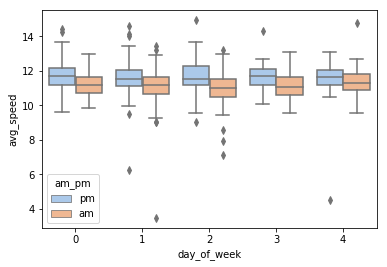

In [268]:
# box plot
ax = sns.boxplot(x=work2way_df.day_of_week,y=work2way_df.avg_speed,data=work2way_df,hue=work2way_df.am_pm, palette='pastel')  

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


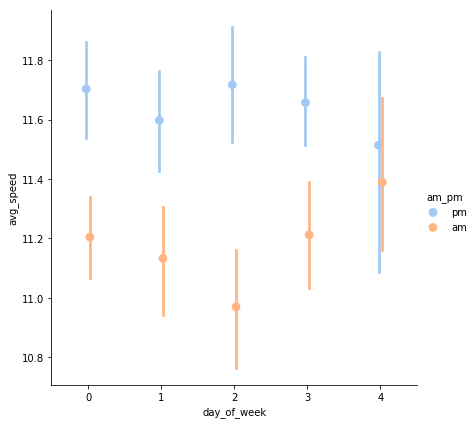

In [283]:
# point plot
g = sns.factorplot(x="day_of_week", y="avg_speed", hue="am_pm", data=work2way_df,
        size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)



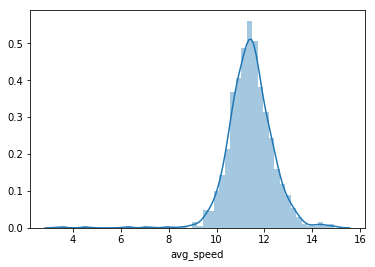

In [231]:
# univariate distribution
ax =sns.distplot(work2way_df.avg_speed)

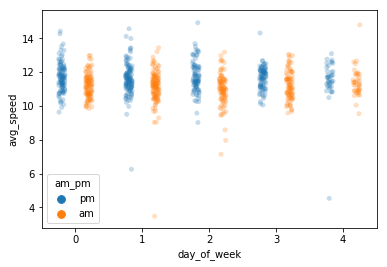

In [271]:
# strip plot
f, ax = plt.subplots()
sns.stripplot(x="day_of_week", y="avg_speed",
              data=work2way_df, hue = 'am_pm',dodge=True, jitter=True,
              alpha=.25, zorder=1)

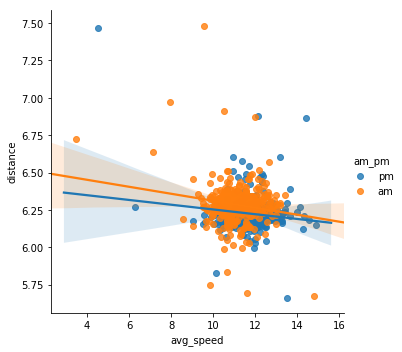

In [273]:
sns.lmplot(x = 'avg_speed', y = 'distance', data = work2way_df , hue = 'am_pm')

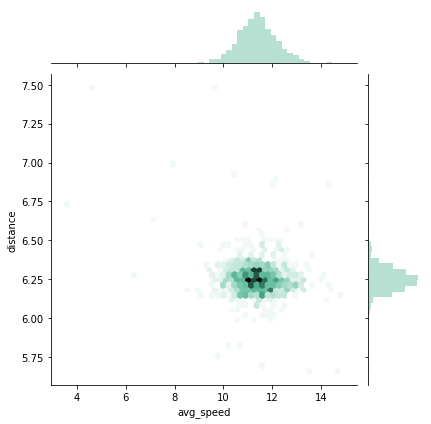

In [274]:
sns.jointplot(work2way_df.avg_speed, work2way_df.distance, kind="hex", color="#4CB391")

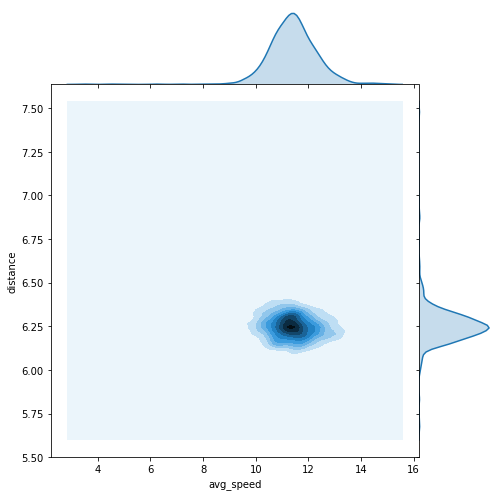

In [275]:
g = sns.jointplot(work2way_df.avg_speed, work2way_df.distance, kind="kde", height=7, space=0)

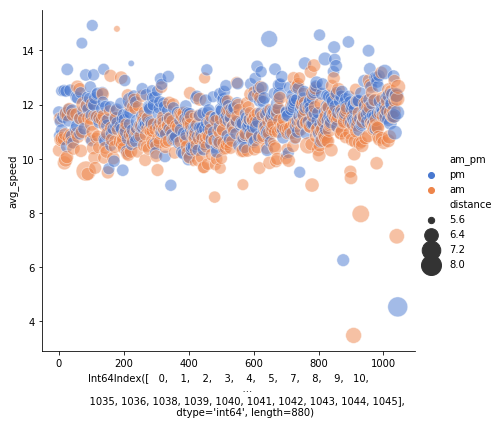

In [282]:
sns.relplot(x=work2way_df.index, y="avg_speed", hue="am_pm", size="distance",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=work2way_df)

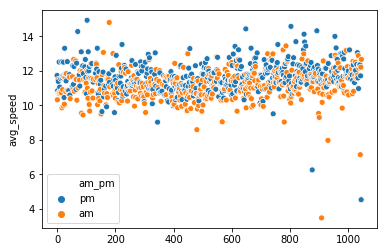

In [269]:
# couldn't figure out the error blocking me from using workout_ts (timestamp)
# as the x variable.  
#
# tried reformatting the time vector: 
# time = work2way_df.workout_ts.apply(lambda x: x.to_datetime())
#
# pyplot didn't throw an error
# ax2 =plt.plot(work2way_df.workout_ts,work2way_df.avg_speed) 

ax =sns.scatterplot(x=work2way_df.index,y=work2way_df.avg_speed, hue = work2way_df.am_pm)


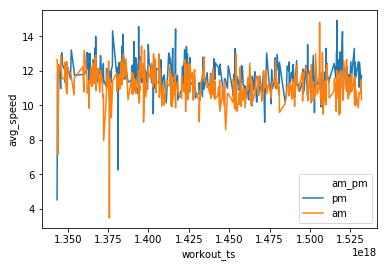

In [262]:
f, ax = plt.subplots()

sns.lineplot(x="workout_ts", y="avg_speed",
             hue="am_pm",
             data=work2way_df)